<a href="https://colab.research.google.com/github/sonjoy1s/kaggle_project/blob/main/fruit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
import numpy as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [196]:
df = pd.read_csv('/content/fruit_classification_dataset.csv')
df.head()

,size (cm),shape,weight (g),avg_price (₹),color,taste,fruit_name
0,25.4,round,3089.2,137.1,green,sweet,watermelon
1,24.6,round,3283.9,163.8,green,sweet,watermelon
2,7.8,round,319.0,91.3,green,sweet,custard apple
3,20.0,oval,1607.0,85.7,orange,sweet,papaya
4,10.2,long,131.5,37.8,yellow,sweet,banana


In [197]:
df.shape

(10000, 7)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   size (cm)      10000 non-null  float64
 1   shape          10000 non-null  object 
 2   weight (g)     10000 non-null  float64
 3   avg_price (₹)  10000 non-null  float64
 4   color          10000 non-null  object 
 5   taste          10000 non-null  object 
 6   fruit_name     10000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 547.0+ KB


In [199]:
df.isna().sum()

,0
size (cm),0
shape,0
weight (g),0
avg_price (₹),0
color,0
taste,0
fruit_name,0


In [200]:
df.duplicated().sum()

np.int64(246)

In [201]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
size (cm),10000.0,8.43060,6.396915,0.9,3.700,7.2,10.100,27.5
weight (g),10000.0,455.45772,731.643087,4.5,45.800,168.8,365.275,3299.8
avg_price (₹),10000.0,77.01672,38.946916,9.0,45.575,75.4,100.700,165.0


In [202]:
numerical_col=['size (cm)','weight (g)','avg_price (₹)']
print('numerical columns are:',numerical_col)

numerical columns are: ['size (cm)', 'weight (g)', 'avg_price (₹)']


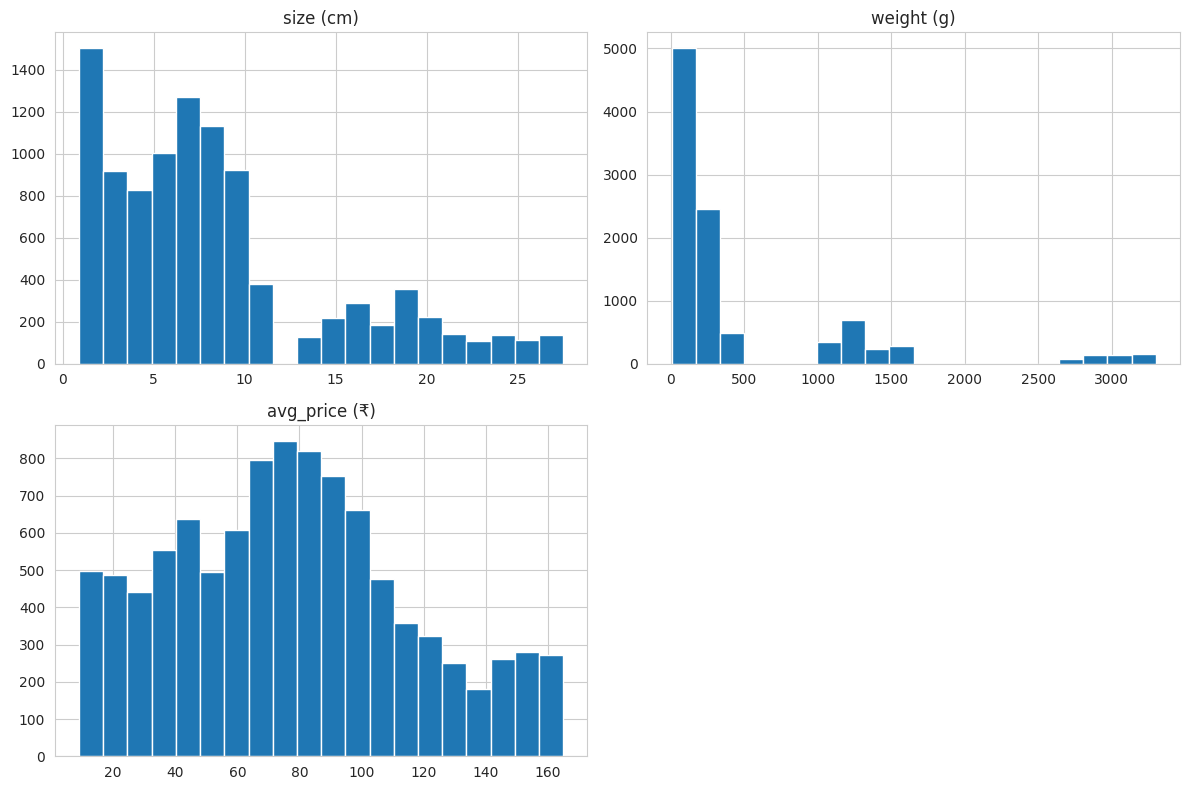

In [203]:
df[numerical_col].hist(figsize=(12,8),bins=20)
plt.title('Numerical Columns Feature of Histogram')
plt.tight_layout()
plt.show()

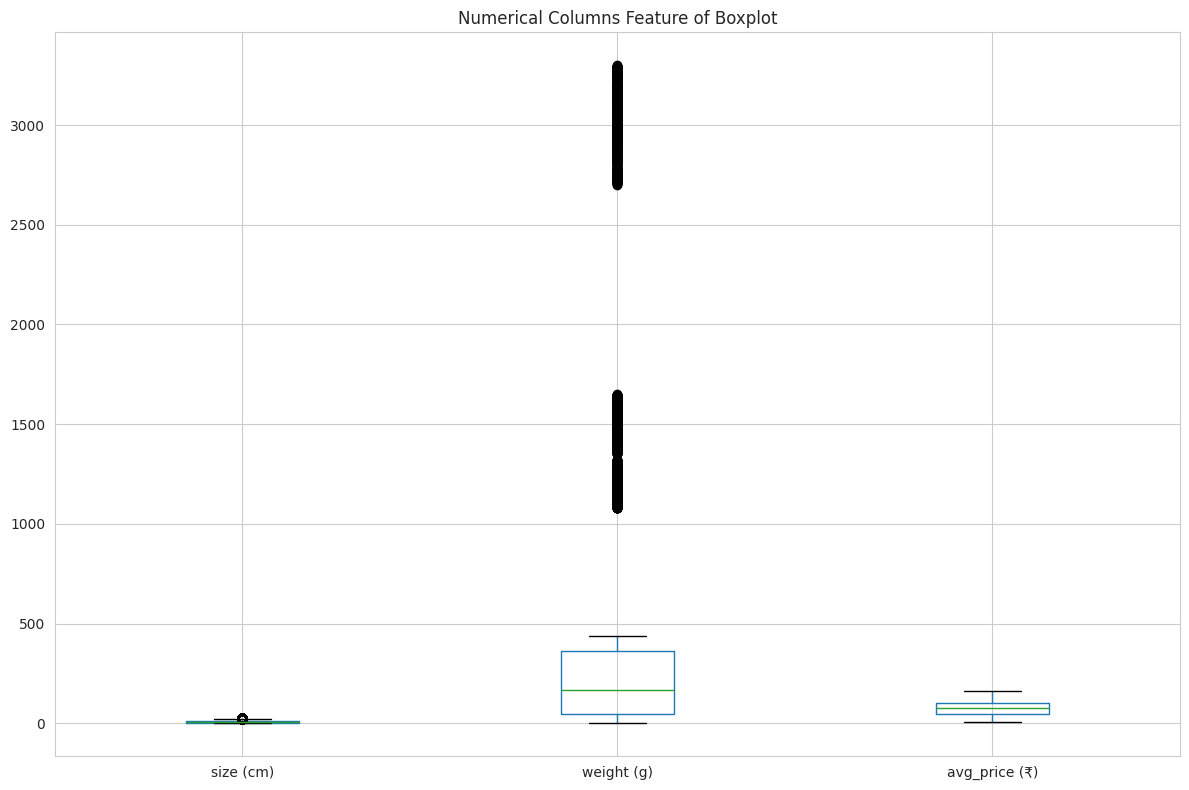

In [204]:
plt.figure(figsize=(12,8))
df[numerical_col].boxplot()
plt.title('Numerical Columns Feature of Boxplot')
plt.tight_layout()
plt.show()

Decision : weight er moddhe outlier ache so i'm used to standard scaler

In [205]:
df.head(2)

,size (cm),shape,weight (g),avg_price (₹),color,taste,fruit_name
0,25.4,round,3089.2,137.1,green,sweet,watermelon
1,24.6,round,3283.9,163.8,green,sweet,watermelon


In [206]:
categorical_col = ['shape','color',	'taste']

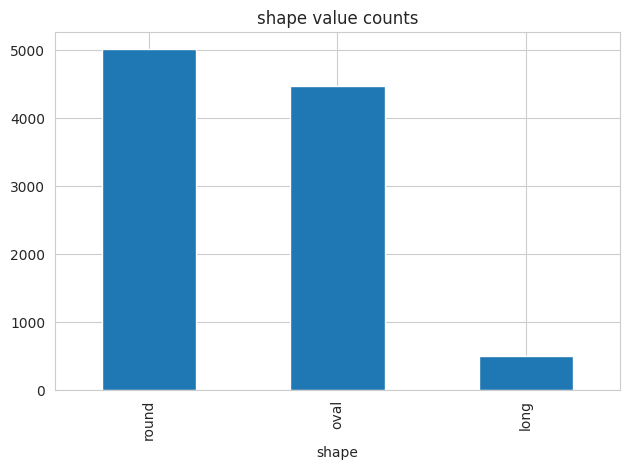

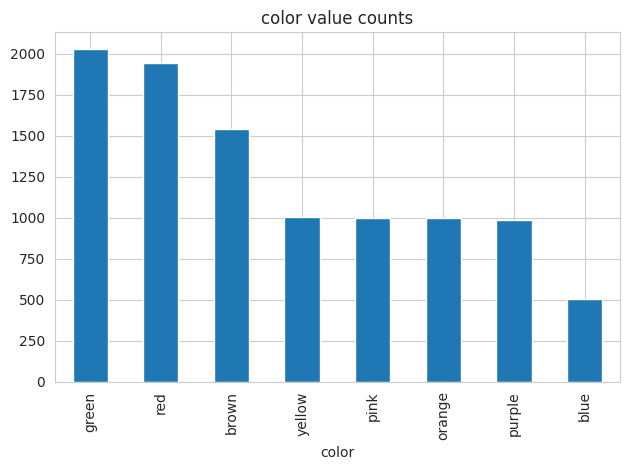

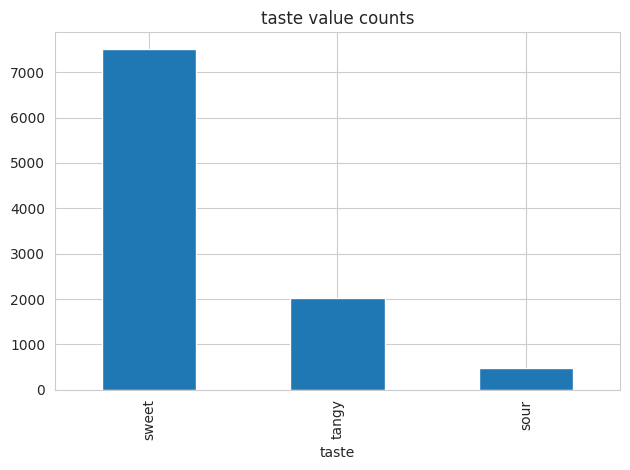

In [207]:
for c in categorical_col:
  df[c].value_counts().plot(kind='bar')
  plt.title(f'{c} value counts')
  plt.tight_layout()
  plt.show()

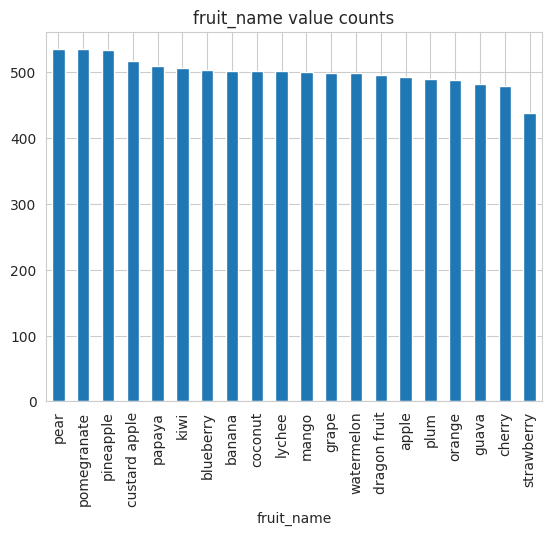

In [208]:
target_col = 'fruit_name'
df[target_col].value_counts().plot(kind='bar')
plt.title(f'{target_col} value counts')
plt.show()

In [209]:
le = LabelEncoder()
df[target_col] = le.fit_transform(df[target_col])

In [210]:
df.head()

,size (cm),shape,weight (g),avg_price (₹),color,taste,fruit_name
0,25.4,round,3089.2,137.1,green,sweet,19
1,24.6,round,3283.9,163.8,green,sweet,19
2,7.8,round,319.0,91.3,green,sweet,5
3,20.0,oval,1607.0,85.7,orange,sweet,13
4,10.2,long,131.5,37.8,yellow,sweet,1


In [211]:
df = pd.get_dummies(df,columns=categorical_col,dtype=int)

In [212]:
df.head()

,size (cm),weight (g),avg_price (₹),fruit_name,shape_long,shape_oval,shape_round,color_blue,color_brown,color_green,color_orange,color_pink,color_purple,color_red,color_yellow,taste_sour,taste_sweet,taste_tangy
0,25.4,3089.2,137.1,19,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,24.6,3283.9,163.8,19,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,7.8,319.0,91.3,5,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,20.0,1607.0,85.7,13,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,10.2,131.5,37.8,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0


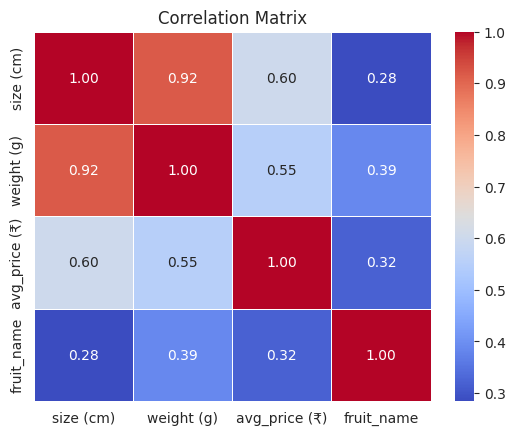

In [213]:
corr_matrix = df[numerical_col +[target_col]].corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidth=0.5)
plt.title('Correlation Matrix')
plt.show()

In [214]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_col] = scaler.fit_transform(df[numerical_col])

In [215]:
from sklearn.model_selection import train_test_split

X = df.drop(target_col, axis=1)
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       125
           2       1.00      1.00      1.00       126
           3       1.00      1.00      1.00       120
           4       1.00      1.00      1.00       126
           5       1.00      1.00      1.00       129
           6       1.00      1.00      1.00       124
           7       1.00      1.00      1.00       125
           8       1.00      1.00      1.00       120
           9       1.00      1.00      1.00       127
          10       1.00      1.00      1.00       125
          11       1.00      1.00      1.00       125
          12       1.00      1.00      1.00       122
          13       1.00      1.00      1.00       127
          14       1.00      1.00      1.00       134
          15       1.00      1.00      1.00       133
          16       1.00      1.00      1.00       122
          17 

In [217]:
sub = pd.DataFrame({
    'fruit_name':le.inverse_transform(pred)
})
sub.to_csv('submission',index=False)